### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

# Thomas ALVES FRAGA MENDES L2 SPRINT

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 
2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 
4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [1]:
# Importation du module numpy
import numpy as np
# Importation du module pyplot de Matplotlib, renommé plt
import matplotlib.pyplot as plt

In [2]:
tho = 0.5 #paramètre fixé

def temps(n):
    return n+tho*np.sqrt(n)

t=[]
for i in range(0,51):
    t.append(temps(i))
    
print(t[1]==1.5)
print(t[4]==5)
print(t[9]==10.5)
print(t[16]==18)
print(t[25]==27.5)

True
True
True
True
True


C'est bien cohérent avec les valeurs cherchés

In [3]:
def vx(n,f,t):
    return ((-1)**n)*np.sqrt(n+1)*np.sin(np.pi*(f-t[n+1]))

def vy(n,f,t):
    return -((-1)**n)*np.sqrt(n+1)*np.cos(np.pi*(f-t[n+1]))

#pour t2:
t2=np.linspace(t[2]-1,t[2],200)
vx2=vx(2,t2,t)
vy2=vy(2,t2,t)

#pour t4:
t4=np.linspace(t[4]-1,t[4],200)
vx4=vx(4,t4,t)
vy4=vy(4,t4,t)

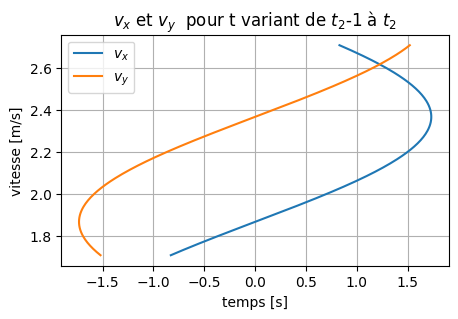

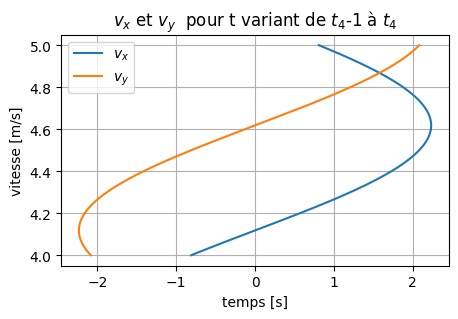

In [4]:
plt.figure(figsize=(5,3))  #taille de l'image 
plt.plot(vx2,t2,label='$v_x$')
plt.plot(vy2,t2,label='$v_y$')
plt.title("$v_x$ et $v_y$  pour t variant de $t_2$-1 à $t_2$")
plt.xlabel("temps [s]")
plt.ylabel("vitesse [m/s]")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(5,3))  #taille de l'image 
plt.plot(vx4,t4,label='$v_x$')
plt.plot(vy4,t4,label='$v_y$')
plt.title("$v_x$ et $v_y$  pour t variant de $t_4$-1 à $t_4$")
plt.xlabel("temps [s]")
plt.ylabel("vitesse [m/s]")
plt.legend()
plt.grid()
plt.show()

In [5]:
#On définit une fonction qui calcule la valeur maximale d'un tableau:
def maximum(tab):
    max=0
    for i in tab:
        if i >max:
            max=i
        else:
            max=max
    return max

vx2_liste=[]
vy2_liste=[]
vx4_liste=[]
vy4_liste=[]

for i in vx2:
    vx2_liste.append(i)

for i in vy2:
    vy2_liste.append(i)

for i in vx4:
    vx4_liste.append(i)

for i in vy4:
    vy4_liste.append(i)

print(f" Le maximum de v_x pour t variant de t_2 -1 à t_2 est {maximum(vx2):.2f} m/s, correspondant à t= {t2[vx2_liste.index(maximum(vx2))]:.2f} s")
print(f" Le maximum de v_y pour t variant de t_2 -1 à t_2 est {maximum(vy2):.2f} m/s, correspondant à t= {t2[vy2_liste.index(maximum(vy2))]:.2f} s")
print("\n")
print(f" Le maximum de v_x pour t variant de t_4 -1 à t_4 est {maximum(vx4):.2f} m/s, correspondant à t= {t4[vx4_liste.index(maximum(vx4))]:.2f} s")
print(f" Le maximum de v_y pour t variant de t_4 -1 à t_4 est {maximum(vy4):.2f} m/s, correspondant à t= {t4[vy4_liste.index(maximum(vy4))]:.2f} s")

 Le maximum de v_x pour t variant de t_2 -1 à t_2 est 1.73 m/s, correspondant à t= 2.37 s
 Le maximum de v_y pour t variant de t_2 -1 à t_2 est 1.52 m/s, correspondant à t= 2.71 s


 Le maximum de v_x pour t variant de t_4 -1 à t_4 est 2.24 m/s, correspondant à t= 4.62 s
 Le maximum de v_y pour t variant de t_4 -1 à t_4 est 2.08 m/s, correspondant à t= 5.00 s


C'est cohérent avec les valeurs qu'on peut déterminer graphiquement

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.
7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?
8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

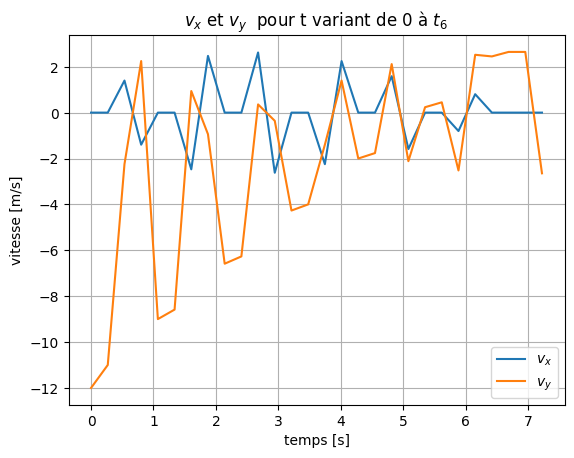

In [9]:
eps=1
#Comme cette fois on veut t entre 0 et t6, il faut distinguer les moments où il est entre les D ou pas :
def vitesses(tab,n):
    vx=[]
    vy=[]
    j=0
    while j<=6:
        
        for i in (tab[j],tab[j+1]-1):
            vx.append(0)
            vy.append(eps*(np.sqrt(n)+(i-t[n])/tho))

        for i in (tab[j+1]-1,tab[j+1]):
            vx.append((eps*np.sqrt(n+1)*np.sin(np.pi*(i-t[n+1]))))
            vy.append(-(eps*np.sqrt(n+1)*np.cos(np.pi*(i-t[n+1]))))     
        j+=1
        
    return vx,vy
    
vx6,vy6=vitesses(t,6)
t6=np.linspace(0,t[6],28)
plt.plot(t6,vx6,label="$v_x$")
plt.plot(t6,vy6,label="$v_y$")
plt.title("$v_x$ et $v_y$  pour t variant de 0 à $t_6$")
plt.xlabel("temps [s]")
plt.ylabel("vitesse [m/s]")
plt.legend()
plt.grid()
plt.show()

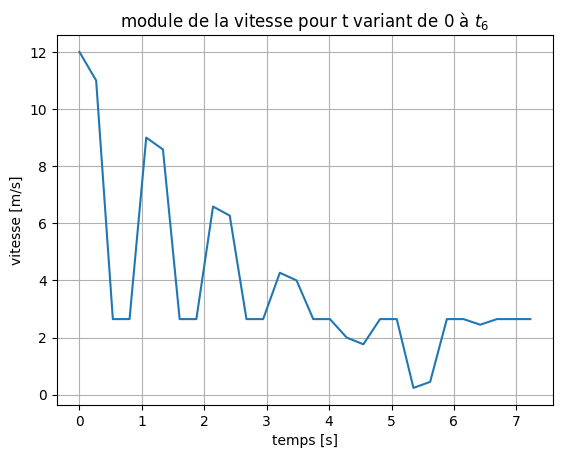

In [13]:
def mod_vitesse(vx,vy,tab):
    mod=[]
    for i in range(len(tab)):
        mod.append(np.sqrt(vx[i]**2+vy[i]**2))
    return mod
    
plt.plot(t6,mod_vitesse(vx6,vy6,t6))
plt.title("module de la vitesse pour t variant de 0 à $t_6$")
plt.xlabel("temps [s]")
plt.ylabel("vitesse [m/s]")
plt.grid()
plt.show()

J'obtiens un résultat pas du tout cohérent car un cyclotron est censé accélérer une particule non ? Je me suis sûrement trompé dans mon raisonnement 

Je refais mais sans considérer cette fois les différents cas en fonction de si il est entre les D ou pas :

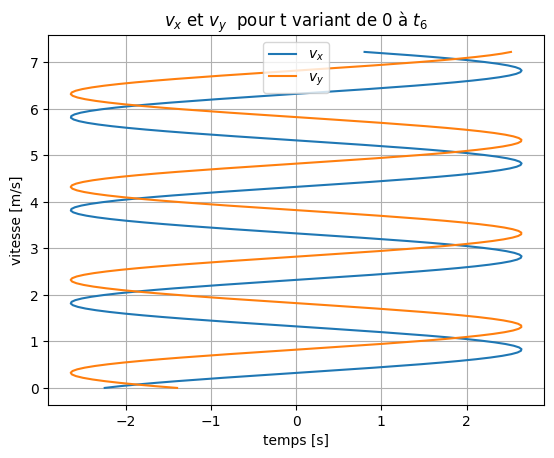

In [16]:
#pour t6:
temps6=np.linspace(0,t[6],200)
vx6_2=vx(6,temps6,t)
vy6_2=vy(6,temps6,t)

plt.plot(vx6_2,temps6,label='$v_x$')
plt.plot(vy6_2,temps6,label='$v_y$')
plt.title("$v_x$ et $v_y$  pour t variant de 0 à $t_6$")
plt.xlabel("temps [s]")
plt.ylabel("vitesse [m/s]")
plt.legend()
plt.grid()
plt.show()

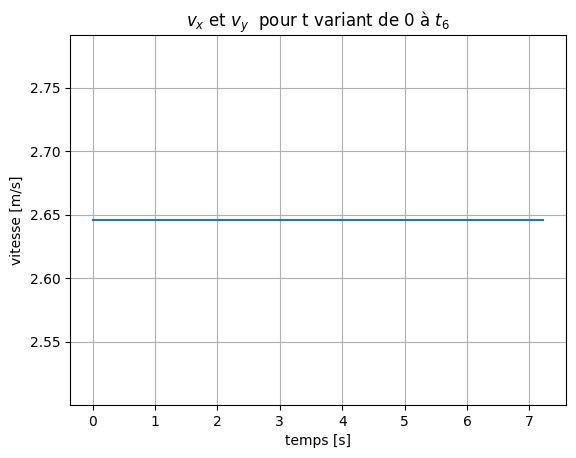

In [17]:
plt.plot(temps6,np.sqrt(vx6_2**2+vy6_2**2))
plt.title("$v_x$ et $v_y$  pour t variant de 0 à $t_6$")
plt.xlabel("temps [s]")
plt.ylabel("vitesse [m/s]")
plt.grid()
plt.show()

Pas cohérent du tout encore une fois